# Part 17: Clustering {-}

Here, we will focus on the general problem of **clustering**, the challenge of dividing
objects into $K$ groups such that similar objects are assigned to the same group.

**Why Cluster?**

Making predictions is a very natural problem; most people can understand
why it is useful to study methods for supervised learning. Applications for
unsupervised learning can be less obvious.

There can be distinct groups present in data sets. This grouping can provide
insight into the structure of the data, and guide further analyses (in the
same way that stocks in different "sectors" may be best modeled separately).

Clustering can also help in the identification of outliers.

The following examples are from finance. Note that I am not making any claims
as to the legitimacy and/or accuracy of their analyses; I am just providing
examples of 
ways in which clustering techniques could be used.

\newpage

**Pavlidis, et al. (2006):** "Financial Forecasting through Unsupervised
Clustering and Neural Networks," _Operational Research_.

The authors use clustering to divide the predictor space into regions of
greater homogeniety, and fit distinct (neural network) models in each of these.

"Although global approximation methods can be applied to model and
forecast time series $\ldots$, it is reasonable to expect that forecasting
accuracy can be improved if regions of the input space exhibiting similar
dynamics are identified and subsequently a local model is constructed for
each of them."

**Das (2003):** "Hedge Fund Classification using K-means Clustering Method,"
_9th International Conference on Computing in Economics and Finance_.

The author proposes using clustering as a means of categorizing hedge funds,
hence improving on the existing "myriad of classifications, some overlapping and
some mutually exclusive."

**Craighead and Klemesrud (2002):** "Stock Selection Based on Cluster and
Outlier Analysis," Nationwide Financial, Columbus, OH.

The authors use clustering to identify outliers that could potentially 
create problems with portfolio selection algorithms. 

\newpage

**Lee, et al. (2010):** "An Effective Clustering Approach to Stock Market
Prediction," _PACIS 2010 Proceedings_

The authors use clustering to divide the financial reports into 
homogeneous groups, and then take the cluster center as a "representative."

"When a financial report is released, we will transform it into a feature vector $\ldots$
[and] we assign [it] to the nearest representative feature vector. Then, we predict the
direction of the stock price movement according to the class label of the nearest
representative feature vector."

In this framework, the clustering serves as a "smoothing" operation on 
"nonstandard"
data (the financial report).

![From Lee, et al. (2010)](Lee.png)

\newpage

**Miceli and Susinno (2003):** "Using Trees to Grow Money," _Risk_

The authors cluster hedge fund performance time
series in order to "visualize a taxonomy embedded in synchronous historical
data." They state that "[i]n a universe with low transparency from an investor's
point of view, and where operating strategies are protected from full disclosure $\ldots$
instruments of classification $\ldots$ would allow the investor to verify the declared
strategies in the statements issued by hedge funds. In particular, nodes anomolous
to a reference cluster help to identify funds that require a deeper investigation."

![From Miceli and Susinno (2003)](Miceli.png)

\newpage

**Leon, et al. (2017):** "Clustering algorithms for Risk-Adjusted Portfolio
Clustering algorithms for Risk-Adjusted Portfolio Construction"

"This paper aims at placing stocks into groups, or clusters, suggested by the raw data, not defined a priori, such that stocks in a given cluster tend to be similar to each other and stocks in different clusters tend to be dissimilar. In terms of financial theory, this purpose allows building highly diversified portfolios. In the following stage, this work proposes a risk-adjusted optimization using Sharpe Ratio for optimal asset allocation into each cluster."

\newpage

## K-Means Clustering {-}

The **K-means clustering algorithm** is a relatively simple
and intuitive approach to dividing the sample ${\bf x}_1, {\bf x}_2,
\ldots, {\bf x}_n$ into $K$ distinct groups.

Despite repeated extensions and enhancements of the method and the growth
of other clustering methods, K-means remains popular and useful.

The algorithm is based on a very natural measure of within-cluster heterogeneity.
Observations are assigned to clusters in an effort to minimize this measure.

It is assumed that $K$ is fixed by the user; the choice of $K$ is a tricky issue.

I will adopt the notation used by _Introduction to Statistical Learning_, Section 10.3.1.

\newpage

First, define $C_k$ to be the set of indices that belong to cluster $k$, for $k=1,2,\ldots,K$. 

Each observation is assigned to exactly one cluster. In other
words, $C_k \subseteq \{1,2,\ldots, n\}$ with
\begin{equation*}
   \bigcup_{k=1}^K C_k = \{1,2,\ldots,n\} \:\:\: \mbox{and $\:C_k, C_{\ell}$ disjoint for $k \neq \ell$}.
\end{equation*}

With K-means, the similarity within cluster $k$ is measured by
\begin{equation*}
   W(C_k) 
%= \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p \left(x_{ij}- x_{i'\!j}\right)^2
   = \sum_{i \in C_k} \sum_{j=1}^p \left(x_{ij}- \overline x_{kj}\right)^2
\end{equation*}
where 
${\bf x}_i = (x_{i1}, x_{i2}, \ldots, x_{ip})$ and
$\overline {\bf x}_k$ is the cluster 
**centroid**, calculated as the sample mean of
the cluster members.

**Exercise:** Under what circumstance(s) will $W(C_k)$ be small?

\answerlines{8}

\newpage

K-means clustering seeks to find the allocation of the observations that minimizes
the **inertia**:
\begin{equation*}
   \sum_{k=1}^K W(C_k)
\end{equation*}

Comparing every possible allocation is not realistic. (Note that there is no restriction
on the sizes of the clusters.)

Instead, the following algorithm is utilized: (Algorithm 10.1 in ISL.)

Randomly assign a number from 1 to $K$ to each fo the observations. These are the
initial cluster assignments. Then repeat until no changes are made to cluster assignments:

1. Find the centroid for each of the $K$ clusters.
2. Re-assign each observation to the cluster whose centroid is closest as measured by Euclidean distance.

**Comment:**
Note that the criterion is guaranteed to not increase with each iteration of the
algorithm, but the search could get caught in a local minimum (and not the global
minimum).

To address this problem, it is standard to repeat the algorithm several times
with different (randomly chosen) starting allocations. If you keep track of the
criterion achieved from each repetition, you can easily determine which allocation
is the best.

\newpage

**K-means in Python**

K-means is implemented in Python using the function `KMeans()` that is
part of `scikit-learn`.

We will cluster our data set of random-chosen
NYSE stocks, with data taken from August 18, 2017 to September
29, 2017.
This is a total of 30 trading days.

In [1]:
import pandas as pd
import numpy as np

stocksample = pd.read_csv("stocksample.txt",
    sep="\t")

stocksample['sector'].fillna("None",
    inplace=True)

stocksamplescl = stocksample.iloc[:,4:34]

for i in range(1000):
    stocksamplescl.iloc[i,:] = \
    (stocksamplescl.iloc[i,:] - \
    np.mean(stocksamplescl.iloc[i,:]))/\
    np.std(stocksamplescl.iloc[i,:])

\newpage

The syntax is simple. The function `KMeans()` initializes the process, while the
`fit()` function finds the clusters.

In [2]:
from sklearn.cluster import KMeans

kminit = KMeans(n_clusters=5, n_init=10)
kmout = kminit.fit(stocksamplescl)

Here I have specified that I want $K=5$ clusters, and that I want
the basic algorithm repeated ten times in order to increase the
chances of finding the global minimum.

Some comments on the output:

1. The rows of `kmout.cluster_centers_` holds the centers of the $K$
clusters. In our example, each center is a vector of length 30.

2. `kmout.labels_` specifies the cluster that each of the
observations has been assigned to.

3. The value of the inertia can be found
from `kmout.inertia_`.

\newpage

We can inspect how the clusters vary with respect to sector.

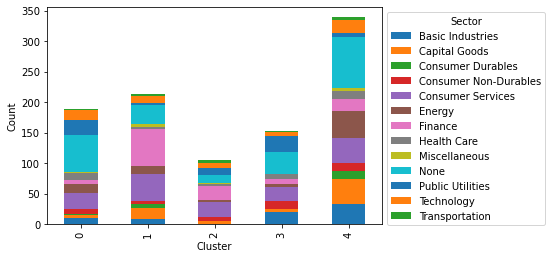

In [3]:
stocksample["kmclust"] = kmout.labels_
stocksample["kmclust"] = \
   stocksample["kmclust"].\
   astype('category').cat.as_unordered()

import matplotlib.pyplot as plt

df = stocksample.groupby(\
   ["kmclust", "sector"])["symb"].\
   count().unstack("sector").fillna(0)
df.plot(kind='bar', stacked=True, 
   legend=False)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Sector", bbox_to_anchor=(1.0, 1.0))
plt.show()

It is also interesting to compare K-means with the output of a dimension reduction technique seen previously:

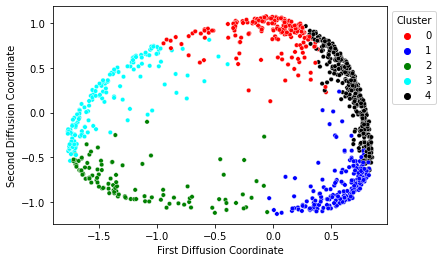

In [4]:
from pydiffmap import diffusion_map as dm
import seaborn as sns

dmap = dm.DiffusionMap.from_sklearn(n_evecs=3, 
   epsilon=50)
dmapoutstocks = \
   dmap.fit_transform(stocksamplescl)

stocksampledmap = pd.concat([stocksample,
   pd.DataFrame(dmapoutstocks, columns=\
   ["dmap1", "dmap2", "dmap3"])], axis=1)

ax = sns.scatterplot(x="dmap1", y="dmap2", 
   data=stocksampledmap,
   s=20, hue="kmclust",
   palette=['red','blue','green','cyan',"black"])
plt.xlabel("First Diffusion Coordinate")
plt.ylabel("Second Diffusion Coordinate")
plt.legend(title="Cluster", 
   bbox_to_anchor=(1.0, 1.0))
plt.show()

**Exercise:** Interpret the plot above.

\answerlines{4}

**Exercise:** Would it seem sensible to run K-means directly on the low-dimensional
representation, e.g., on the diffusion
coordinates?

\answerlines{4}

\newpage

## Hierarchical Clustering {-}

Another class of clustering procedures, called **hierarchical clustering**,
are characterized by the distinctive **dendrograms**
they create to depict the relationships between observations.

An appealing feature of these methods is that the creation of the dendrogram
does not require the specification of the number of clusters.
Sometimes, the dendrogram
my reveal an "obvious" division among the observations, and hence suggest
the number of clusters needed.

This clustering method allows the user to specify a measure
of dissimilarity. Often, Euclidean distance is
used (just as in K-means).

\newpage

It is useful to begin by understanding how to interpret the dendrogram.
An example is given below.

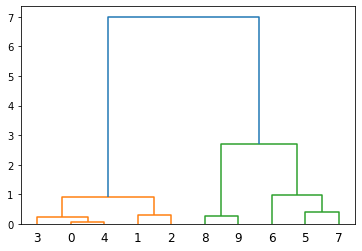

In [5]:
np.random.seed(0)
x = np.random.normal(\
   loc=[0,0,0,0,0,5,5,5,7,7],
   scale=0.5, size=10)

from scipy.cluster import hierarchy

Z = hierarchy.linkage(x.reshape(10,1),
   "complete")
hierarchy.dendrogram(Z)
None

\newpage

Observations which are similar are "linked" at a low height in
the dendrogram. For instance, to link observations 5 and 6, you need only
go up to a height of approximately 1.0. These two observations are quite
similar. But, in order to link observations 1 and 9, you need to go to a
height of approximately 7. These are quite dissimilar. 

The units for "height" match the units of the dissimilarity metric that
the user provides.

**Exercise:** Which pair are more similar: 5 and 7,
or 3 and 4?

\answerlines{4}

Clusters can be formed by "cutting" the dendrogram at a user-chosen height. It may
seem "clear" by looking at the dendrogram that cutting at around a height of 3 would
be a good choice. The results is three clusters.

Note that in this case I generated the ten observations from the normal distribution
with a standard deviation of 0.5. The mean for observations 0 thru 4 was 0, for observations
5 thru 7 was 5, and for observations 8 and 9 was 7. This explains the structure in the
dendrogram.

\newpage

**Building the Dendrogram**

The process of constructing the dendrogram is quite intuitive.

First, the two observations which are the most similar (as measured by the
chosen dissimilarity metric) and joined together, at a height equal to their
dissimilarity. In our example above, observations 0 and 4 were the first to
be joined, at a height very close to zero.

This process then continues, with the most similar objects joined together
at the appropriate height. **But:** Once observations are joined, they are
**treated as a unit** from that point on. For instance, in the second step
in the construction of the dendrogram above, observation 3 was joined with the
**unit consisting of 0 and 4**.

This process continues until all observations are joined.

\newpage

The obvious question is thus: **How is the dissimilarity of collections of observations
calculated?** There are a few different approaches. Two of the standard ones are
as follows:

With **complete linkage**, the distance between sets of observations, $S_i$ and $S_j$, 
is defined to be
the **maximal** dissimilarity between all pairs $x \in S_i$ and $y \in S_j$.

With **single linkage**, the distance between sets of observations, $S_i$ and $S_j$,
is defined to be
the **minimal** dissimilarity between all pairs $x \in S_i$ and $y \in S_j$.

Less-commonly used options are **centroid linkage**, in which the distance between
$S_i$ and $S_j$ is calculated as the dissimilarity between the centroids of the two
groups, and **average linkage**, calculated as the average distance between all
pairs of elements in $S_i$ and $S_j$.

\newpage

**Hierarchical Clustering in Python**

The function `hierarchy()` from `scipy.cluster`
performs hierarchical clustering in Python.

This function, by default, calculates the Euclidean distance
between the provided **rows** of the data in order to construct
the clusters.

The syntax for complete linkage clustering is as follows.
(Note that only the first 100 stocks are used, since the dendrogram
becomes difficult to read otherwise. There is no such practical limit
in using this method, however.)

Other choices for `method` include `single`, `centroid`, and `average`.

In [6]:
hcout = hierarchy.linkage(\
   stocksamplescl[:100], method="complete")

The function `dendrogram()` constructs the dendrogram.

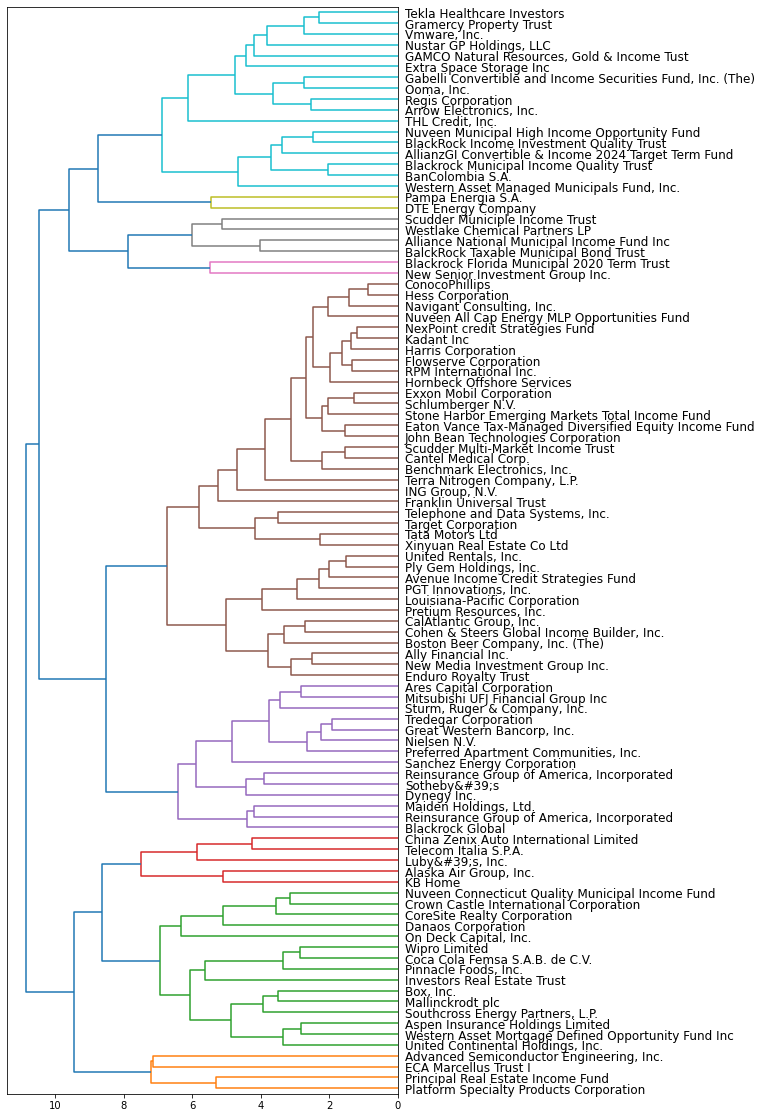

In [7]:
fig, axs = plt.subplots(1, 1, 
   figsize=[7,20])

labs = pd.array(stocksample.name\
   [0:100]).astype("str")
hierarchy.dendrogram(hcout,ax=axs,
   orientation="left",labels=labs,
   leaf_font_size=12)
None

Another useful function is `fcluster()`. This will return
cluster membership for each of the observations. With
`criterion = "maxclust"`, the argument `t` specifies the
number of clusters to return.

In [11]:
hierarchy.fcluster(hcout, t=5,
    criterion = "maxclust")[0:5]

array([5, 1, 4, 1, 1], dtype=int32)

With
`criterion = "distance"`, the argument `t` specifies the
level at which to cut the tree.

In [9]:
hierarchy.fcluster(hcout, t=10,
   criterion = "distance")[0:5]

array([2, 1, 3, 1, 1], dtype=int32)

\newpage

We can again inspect how the clusters vary with respect to sector:

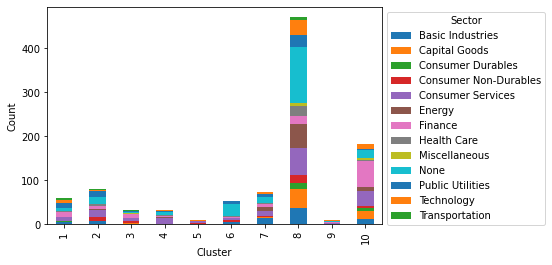

In [10]:
hcout = hierarchy.linkage(stocksamplescl, 
   "complete")
stocksample["hcclust"] = hierarchy.fcluster\
   (hcout, t=10, criterion="maxclust")
stocksample["hcclust"] = stocksample["hcclust"].\
   astype('category').cat.as_unordered()

df = stocksample.groupby(["hcclust", "sector"])\
   ["symb"].count().unstack("sector").fillna(0)
df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Sector", bbox_to_anchor=(1.0, 1.0))
plt.show()